In [60]:
import tensorflow as tf

a = tf.constant(3)
b = tf.constant(2)

c = tf.multiply(a, b)

x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

z = tf.multiply(x,y)

with tf.Session() as sess:
   
    output = sess.run(z, feed_dict={x:3, y:3})
    print output
    print c.eval()
    print sess.run(c)
    print sess.run(a + b)

9
6
6
5


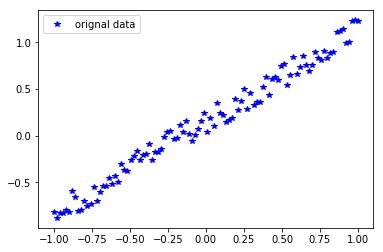

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1,1,100)
Y = X + np.random.rand(*X.shape)*0.3
plt.plot(X, Y, 'b*', label = 'orignal data')
plt.legend()
plt.show()

('Epoch', 1, 'cost=', 0.15487921, 'w=', array([1.3944764], dtype=float32), 'b=', array([0.38453975], dtype=float32))
('Epoch', 3, 'cost=', 0.03252094, 'w=', array([1.812857], dtype=float32), 'b=', array([0.30034852], dtype=float32))
('Epoch', 5, 'cost=', 0.021054959, 'w=', array([1.9293443], dtype=float32), 'b=', array([0.2569321], dtype=float32))
('Epoch', 7, 'cost=', 0.020199424, 'w=', array([1.959604], dtype=float32), 'b=', array([0.24534167], dtype=float32))
('Epoch', 9, 'cost=', 0.020123208, 'w=', array([1.9674313], dtype=float32), 'b=', array([0.24233833], dtype=float32))
('Epoch', 11, 'cost=', 0.020113219, 'w=', array([1.9694549], dtype=float32), 'b=', array([0.24156182], dtype=float32))
('Epoch', 13, 'cost=', 0.020111287, 'w=', array([1.969978], dtype=float32), 'b=', array([0.24136105], dtype=float32))
('Epoch', 15, 'cost=', 0.020110829, 'w=', array([1.9701136], dtype=float32), 'b=', array([0.24130908], dtype=float32))
('Epoch', 17, 'cost=', 0.020110715, 'w=', array([1.9701489]

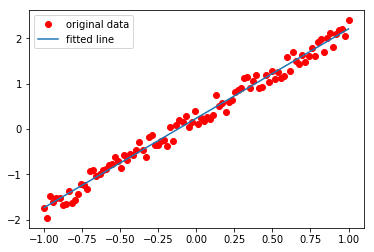

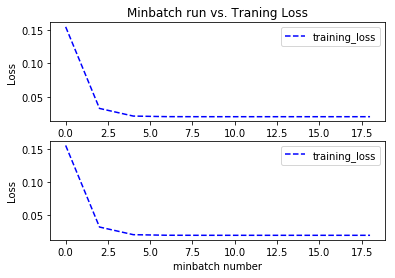

('x = 3, z=', array([6.1517696], dtype=float32))


In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def moving_avg(a, w=15):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Train_X = np.linspace(-1,1,100)
Train_Y = 2*Train_X + np.random.rand(*Train_X.shape)*0.5

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

Z = tf.multiply(X, W) + b

cost = tf.reduce_mean(tf.square(Z - Y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

train_epochs = 20
display_step = 2


with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(train_epochs):
        for (x,y) in zip(Train_X,Train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % display_step == 0:
            loss = sess.run(cost , feed_dict={X:Train_X, Y:Train_Y})
            print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))
            if not (loss == "NA"):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print "Done"
    print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))
    
   
    plt.plot(Train_X, Train_Y, 'ro', label='original data')
    plt.plot(Train_X, sess.run(W)*Train_X+ sess.run(b), label='fitted line')
    plt.legend()
    plt.show()
    
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'],moving_avg(plotdata['loss']),'b--',label='training_loss')
    plt.xlabel('minbatch number')
    plt.ylabel('Loss')
    plt.title('Minbatch run vs. Traning Loss')
    plt.legend()
 
    
    plt.subplot(212)
    plt.plot(plotdata['batchsize'],plotdata['loss'],'b--',label='training_loss')
    plt.xlabel('minbatch number')
    plt.ylabel('Loss')
    #plt.title('Minbatch run vs. Traning Loss')
    plt.legend()
    plt.show()
    print ("x = 3, z=", sess.run(Z, feed_dict={X: 3}))



<type 'numpy.ndarray'>


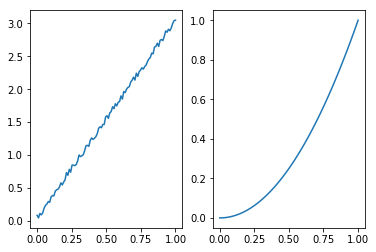

In [35]:
#import tensorflow as tf
#print tf.__version__
import numpy as np

Train_X = np.linspace(-1,1,100)
Train_Y = Train_X + np.random.rand(*Train_X.shape)*0.3
print type(Train_Y)

X = np.linspace(0,1,100)
Y = X*3 + np.random.rand(100)*0.1
plt.subplot(121)
plt.plot(X,Y)
plt.subplot(122)
Y = np.power(X,2)
plt.plot(X,Y)

plt.show()



In [34]:
with tf.Session():
    print tf.random_normal([1,20]).eval()
print type(tf.random_normal([1]))

[[-2.0242448  -1.2619288  -0.46419    -1.1627544   0.24663381 -1.477585
   0.9457541  -1.6389891  -0.07826551  0.19936621 -0.58771247 -0.01970202
  -0.3178585  -0.2848074  -0.7402107  -0.38181335 -0.53935575 -0.6713734
  -0.88515955 -0.71550924]]
<class 'tensorflow.python.framework.ops.Tensor'>
